1. IMPORT LIBRARY DAN PENJELASAN MASING-MASING FUNGSI LIBRARY

In [1]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from shapely.geometry import Polygon, Point 

FUNGSI LIBRARY 
1. Pandas : Manipulasi dan analisis data tabular secara terstruktur
2. Geopandas : Membaca dan mengolah data spasial
3. Folium : Membuat peta interaktif berbasis web
4. Matplotlib : Membuat visualisasi grafik
5. Seaborn : Membuat visualisasi data statistik 
6. Numpy : Melakukan operasi numerik
7. Shapely : Membuat, menganalisis, dan memamnipulasi objek geometri (titik, garis, dan poligon)

2. LOAD DATA GEOJSON

LOAD FILE DATA

In [2]:
pluvial_path = r"D:\WEBGIS\PHYTON\MAPID_WEBGIS_BOOTCAMP\Labs\data_point_pluvial_flood_dataset.geojson"

MENAMPILKAN DATA FRAME

In [3]:
gdf_pluvial = gpd.read_file(pluvial_path)

print(gdf_pluvial.head())

          X         Y      Slope    Curvature       Aspect       TWI     FA  \
0  3.909444  7.443056  46.686142 -3.888000e+09   45.000000 -3.250368  147.0   
1  3.908611  7.442778  52.151768  1.296000e+09   60.945396 -4.313832   61.0   
2  3.908889  7.442778  66.484085  0.000000e+00   67.619865 -8.327622    1.0   
3  3.909167  7.442778  58.007183 -2.592000e+09   38.659809 -4.707937   51.0   
4  3.909444  7.442778  60.503792 -1.296000e+09  351.869904 -5.985817   15.0   

   Drainage    Rainfall     SUSCEP                 geometry  
0  228.8528  101.515616  Very_High  POINT (3.90944 7.44306)  
1  229.6781   80.409863  Very_High  POINT (3.90861 7.44278)  
2  230.5920   78.986849  Very_High  POINT (3.90889 7.44278)  
3  235.4210   81.953151  Very_High  POINT (3.90917 7.44278)  
4  234.4346   85.866027  Very_High  POINT (3.90944 7.44278)  


3. EKSPLORASI STRUKTUR DATA

INFO DATA FRAME

In [4]:
print("Info Data Frame Pluvial Flood")
print(gdf_pluvial.info())

Info Data Frame Pluvial Flood
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 144401 entries, 0 to 144400
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   X           144401 non-null  float64 
 1   Y           144401 non-null  float64 
 2   Slope       144119 non-null  float64 
 3   Curvature   144401 non-null  float64 
 4   Aspect      144401 non-null  float64 
 5   TWI         144401 non-null  float64 
 6   FA          144401 non-null  float64 
 7   Drainage    144401 non-null  float64 
 8   Rainfall    144401 non-null  float64 
 9   SUSCEP      144401 non-null  str     
 10  geometry    144401 non-null  geometry
dtypes: float64(9), geometry(1), str(1)
memory usage: 12.1 MB
None


INFO STATISTIK DESKRIPTIF

In [5]:
print("Statistik Deskriptif Pluvial Food South West Nigeria")
print(gdf_pluvial.describe())

Statistik Deskriptif Pluvial Food South West Nigeria
                   X              Y         Slope    Curvature         Aspect  \
count  144401.000000  144401.000000  1.441190e+05  1.444010e+05  1.444010e+05   
mean        3.891534       7.374551 -2.502788e+35 -8.342043e+35 -1.673122e+35   
std         0.027887       0.032459  9.225150e+36  1.682769e+37  7.543591e+36   
min         3.831111       7.311389 -3.402823e+38 -3.402823e+38 -3.402823e+38   
25%         3.868889       7.348333  5.105756e+01 -2.592000e+09  1.013099e+02   
50%         3.891667       7.374167  6.198023e+01  0.000000e+00  1.894623e+02   
75%         3.913611       7.400278  6.916712e+01  2.592000e+09  2.700000e+02   
max         3.954444       7.443056  8.657541e+01  3.888000e+10  3.591449e+02   

                TWI            FA       Drainage       Rainfall  
count  1.444010e+05  1.444010e+05  144401.000000  144401.000000  
mean  -2.120858e+34 -2.120858e+35     219.714542      74.786932  
std    2.686356e+36

4. VISUALISASI DISTRIBUSI PARAMETER

HISTOGRAM SLOPE

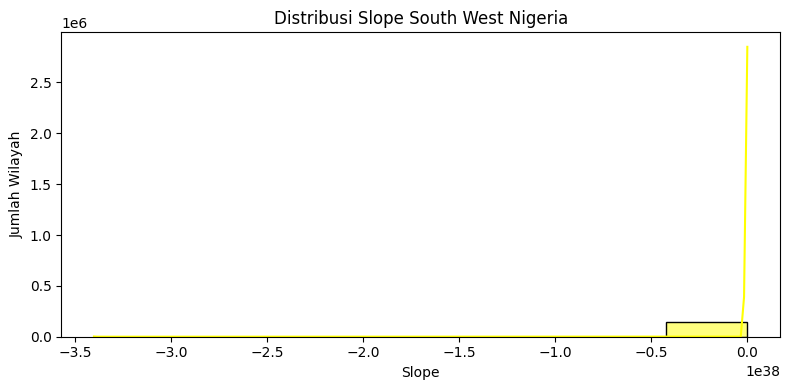

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(gdf_pluvial['Slope'], bins=8, kde=True, color='yellow')
plt.title('Distribusi Slope South West Nigeria')
plt.xlabel('Slope')
plt.ylabel('Jumlah Wilayah')
plt.tight_layout()
plt.show()

HISTOGRAM RAINFALL

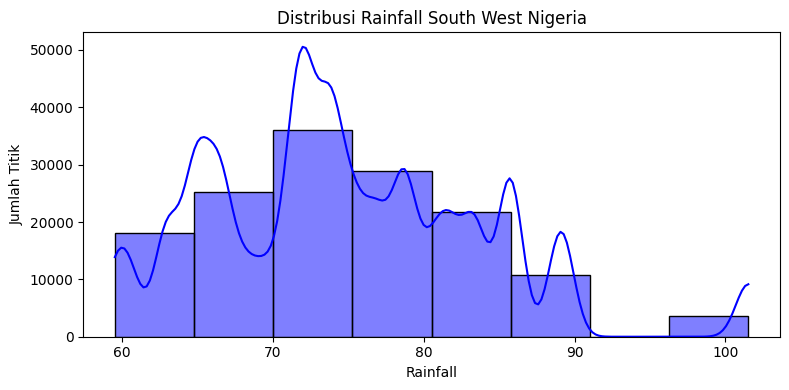

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(gdf_pluvial['Rainfall'], bins=8, kde=True, color='blue')
plt.title('Distribusi Rainfall South West Nigeria')
plt.xlabel('Rainfall')
plt.ylabel('Jumlah Titik')
plt.tight_layout()
plt.show()

Berdasarkan histogram diatas, dapat disimpulkan bahwa rata-rata curah hujan di South West Nigeria pada angka 75 mm yang tersebar di kurang lebih 35.000 titik. Jika data yang digunakan adalah intensitas curah hujan harian maka wilayah South West Nigeria memiliki curah hujann yang tinggi. Sedangkan jika data yang digunakan adalah intensitas curah hujan bulanan, South West Nigeria memiliki curah hujan yang rendah. Wilayah yang memiliki curah hujan di atas 100 mm tersebar di kurang lebih 5.000 titik. 

5. ANALISIS KATEGORI SUSCEPTIBILITY

JUMLAH TITIK PER KATEGORI SUSCEPTIBILITY

In [8]:
susceptibility_count = gdf_pluvial['SUSCEP'].value_counts()
susceptibility_str = ', '.join([f"{v} wilayah {k.lower()}" for k, v in susceptibility_count.items()])
print(susceptibility_count)

SUSCEP
Moderate     38116
High         34451
Low          32252
Very_High    23456
No_Flood     16126
Name: count, dtype: int64


VISUALISASI ANALISIS SUSCEPTIBILITY

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17096\3903323402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SUSCEP', data=gdf_pluvial, palette='viridis')


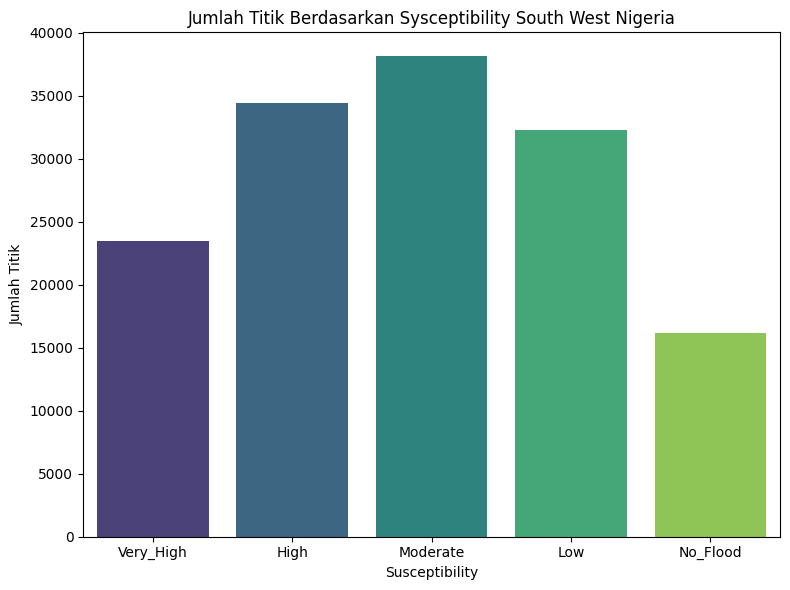

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x='SUSCEP', data=gdf_pluvial, palette='viridis')
plt.title('Jumlah Titik Berdasarkan Sysceptibility South West Nigeria')
plt.xlabel('Susceptibility')
plt.ylabel('Jumlah Titik')
plt.tight_layout()
plt.show()

6. SCATTER PLOT HUBUNGAN PARAMETER

SCATTER PLOT ANTARA SLOPE DAN RAINFALL

d:\WEBGIS\PHYTON\MAPID_WEBGIS_BOOTCAMP\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


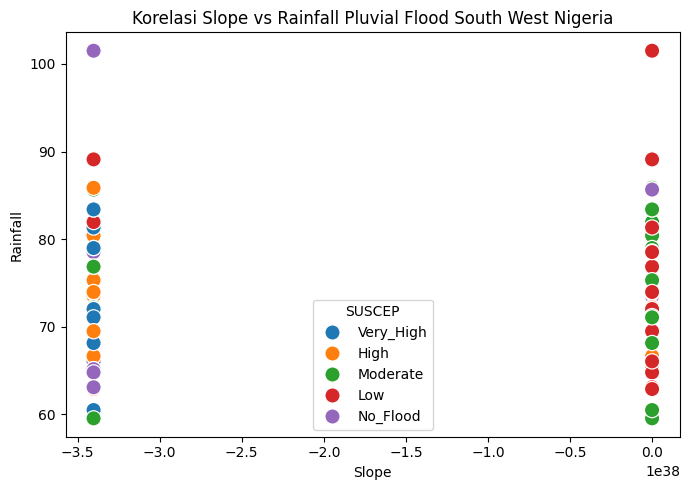

In [10]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Slope', y='Rainfall',
                data=gdf_pluvial, hue='SUSCEP', s=120)
plt.title('Korelasi Slope vs Rainfall Pluvial Flood South West Nigeria')
plt.xlabel('Slope')
plt.ylabel('Rainfall')
plt.tight_layout()
plt.show()

SCATTER PLOT ANTARA DRAINAGE DAN RAINFALL

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17096\4035004184.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
d:\WEBGIS\PHYTON\MAPID_WEBGIS_BOOTCAMP\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


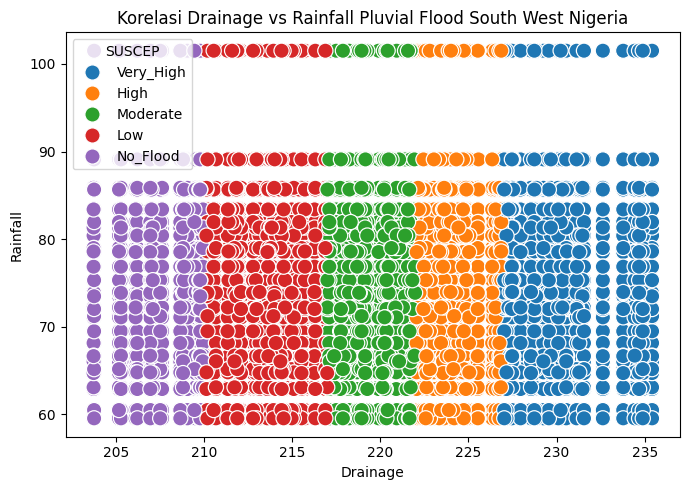

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Drainage', y='Rainfall',
                data=gdf_pluvial, hue='SUSCEP', s=120)
plt.title('Korelasi Drainage vs Rainfall Pluvial Flood South West Nigeria')
plt.xlabel('Drainage')
plt.ylabel('Rainfall')
plt.tight_layout()
plt.show()

7. HEATMAP KORELASI PARAMETER

MENGHITUNG MATRIKS KORELASI ANTAR PARAMETER

In [12]:
corr_matrix = gdf_pluvial[['Slope', 'Aspect', 'TWI', 'FA', 'Drainage', 'Rainfall']].corr()
print(corr_matrix)

             Slope    Aspect       TWI        FA  Drainage  Rainfall
Slope     1.000000  0.455441  0.168172  0.495123 -0.000755  0.003024
Aspect    0.455441  1.000000  0.197677  0.374949  0.001160  0.001002
TWI       0.168172  0.197677  1.000000 -0.000197  0.009163  0.007643
FA        0.495123  0.374949 -0.000197  1.000000  0.003004  0.000592
Drainage -0.000755  0.001160  0.009163  0.003004  1.000000  0.000036
Rainfall  0.003024  0.001002  0.007643  0.000592  0.000036  1.000000


VISUALISASI HEATMAP

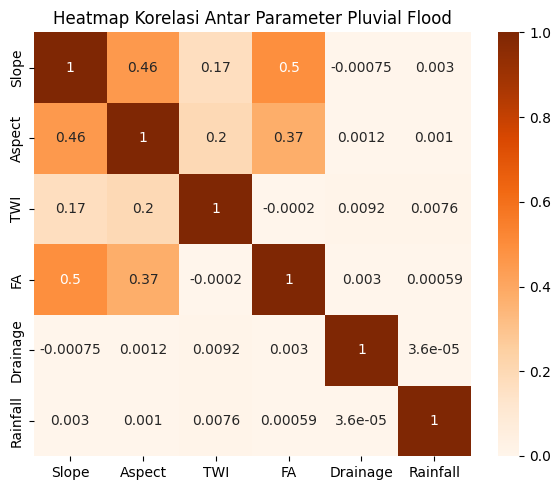

In [13]:
corr_matrix = gdf_pluvial[['Slope', 'Aspect', 'TWI', 'FA', 'Drainage', 'Rainfall']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='Oranges')
plt.title('Heatmap Korelasi Antar Parameter Pluvial Flood')
plt.tight_layout()
plt.show()

8. Peta Interaktif Titik Flood

FILTER DATA FLOOD 

In [14]:
Titik_Pluvial_Flood = gdf_pluvial.sample(n=10)
print(Titik_Pluvial_Flood)

               X         Y      Slope    Curvature       Aspect       TWI  \
43615   3.848333  7.394722  62.880856  0.000000e+00  230.194427 -7.248393   
43628   3.851944  7.394722  72.944717 -9.072000e+09  184.398712 -8.677145   
91619   3.889722  7.360278  69.705597  6.480000e+09  123.690071 -9.183481   
112617  3.916667  7.345000  45.000000 -7.776000e+09    0.000000 -6.242779   
111623  3.840278  7.345556  29.205933 -1.296000e+09  333.434937 -0.971167   
67232   3.924167  7.377778  79.782578 -2.592000e+09  194.349335 -8.803528   
27038   3.874722  7.407500  69.665657 -5.184000e+09  346.607513 -6.878755   
65080   3.855000  7.379167  29.205933 -3.888000e+09  206.565048 -3.212664   
113819  3.853889  7.343889  66.545860  9.072000e+09   77.471191 -9.023720   
29966   3.941944  7.405278  51.340191  0.000000e+00  180.000000 -8.411832   

           FA  Drainage    Rainfall     SUSCEP                 geometry  
43615     4.0  222.2281   72.202740       High  POINT (3.84833 7.39472)  
4362

PETA INTERAKTIF TITIK SAMPEL PLUVIAL FLOOD

In [15]:
Titik_Pluvial_Flood = gdf_pluvial.sample(n=10, random_state=42)

center_pluvial_longitude = Titik_Pluvial_Flood.geometry.x.mean()
center_pluvial_latitude = Titik_Pluvial_Flood.geometry.y.mean()
m = folium.Map(location=[center_pluvial_latitude, center_pluvial_longitude], zoom_start=12, tiles='OpenStreetMap')

folium.GeoJson(
    Titik_Pluvial_Flood,
    style_function=lambda feature:{
        'fillColor': '#3186cc',
        'color': 'black',
        'weight': 2,
        'FillOpacity': 0.5,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['Slope', 'Aspect', 'TWI', 'FA', 'Drainage', 'Rainfall', 'SUSCEP'],
        aliases=['Slope:', 'Aspect:', 'TWI:', 'FA:', 'Drainage:', 'Rainfall:', 'Susceptibility:'],
        localize=True
    )
).add_to(m)

for idx, row in Titik_Pluvial_Flood.iterrows():
    lat = row.geometry.y
    lon = row.geometry.x

    popup_info=f"Susceptibility: {row['SUSCEP']}<br>Slope: {row['Slope']}<br>Rainfall: {row['Rainfall']}"
    
    folium.Marker(
        location=[lat, lon],
        popup=folium.Popup(popup_info, max_width=300),
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

#Menyimpan Peta
m.save('WEBGIS_PLUVIAL_FLOOD_SOUTH_WEST_NIGERIA.html')
print("Peta Berhasil Disimpan")

Peta Berhasil Disimpan
